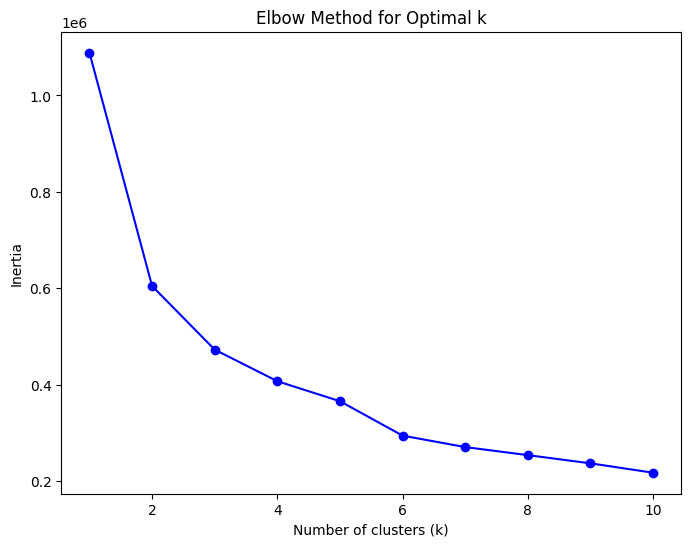

   target  KMeans_cluster
0       0               1
1       1               0
2       1               1
3       0               1
4       0               1
5       0               1
6       1               0
7       0               0
8       1               1
9       1               1


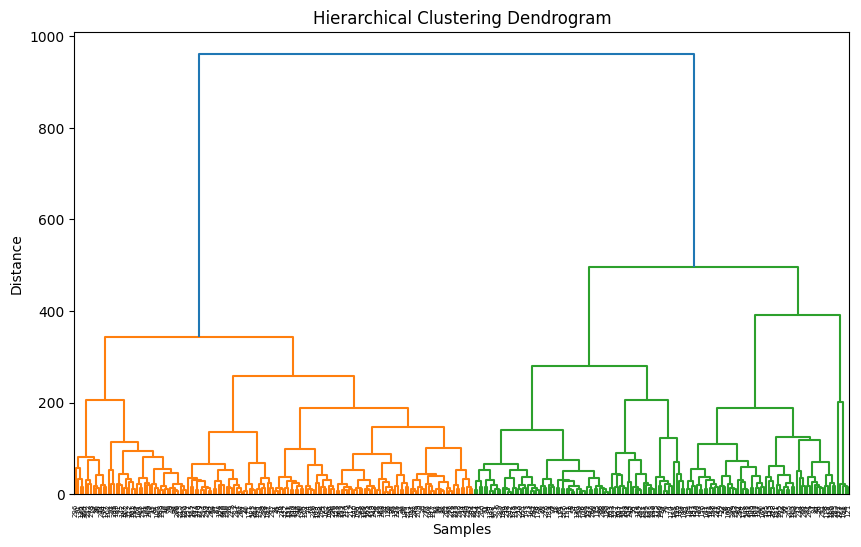

   target  Hier_cluster
0       0             1
1       1             0
2       1             1
3       0             0
4       0             1
5       0             0
6       1             0
7       0             0
8       1             0
9       1             1
KMeans vs Traget:
 KMeans_cluster   0    1
target                 
0               50  114
1               61   78

Hierarchical vs Traget:
 Hier_cluster   0   1
target              
0             69  95
1             78  61


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage


df = pd.read_csv("../data/heart_disease.csv")

X = df.drop("target", axis=1)
y = df["target"]

#          KMEANS        

# ELBOW METHOD
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,6))
plt.plot(K, inertia, "bo-")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()


# KMEANS
kmeans = KMeans(n_clusters=2, random_state=42)
df["KMeans_cluster"] = kmeans.fit_predict(X)

print(df[["target", "KMeans_cluster"]].head(10))


#     HIERARCHICAL CLUSTERING   

# Dendrogram
plt.figure(figsize=(10, 6))
Z = linkage(X, method="ward")
dendrogram(Z)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()


# hierarchical clustering
hier_cluster = AgglomerativeClustering(n_clusters=2, linkage="ward")
df["Hier_cluster"] = hier_cluster.fit_predict(X)

print(df[["target", "Hier_cluster"]].head(10))


# COMPARE WITH ACTUAL TARGET
crosstab_kmeans = pd.crosstab(df["target"],df["KMeans_cluster"])
crosstab_hier = pd.crosstab(df["target"],df["Hier_cluster"])

print("KMeans vs Traget:\n",crosstab_kmeans)
print("\nHierarchical vs Traget:\n", crosstab_hier)

